In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

In [4]:
df= pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(714, 3)

In [8]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [22]:
x.shape

(714, 2)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [12]:
clf = DecisionTreeClassifier()

In [13]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6293706293706294

In [15]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6359350547730829

## Applying Descretizer

In [16]:
kabin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kabin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [17]:
trf = ColumnTransformer(([
    ('first',kabin_age,[0]),
    ('second',kabin_fare,[1])
]))

In [18]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.fit_transform(x_test)

In [21]:
x_train_trf.shape

(571, 2)

In [41]:
trf.named_transformers_['first'].n_bins_         ### gives how many bins are created

array([15])

In [42]:
trf.named_transformers_['second'].bin_edges_     ### gives quantile range

array([array([  0.        ,   7.17166667,   7.77333333,   7.925     ,
                8.05      ,   9.5       ,  10.5       ,  13.        ,
               17.69333333,  22.62      ,  26.35276667,  31.275     ,
               38.1       ,  53.22666667,  79.27666667, 512.3292    ])],
      dtype=object)

In [43]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [44]:
output['age_labels'] = pd.cut(x=x_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [1]:
output.sample(5)

NameError: name 'output' is not defined

In [47]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)


y_pred = clf.predict(x_test_trf)

accuracy_score(y_test,y_pred)

0.6503496503496503

In [77]:

def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6303208137715179


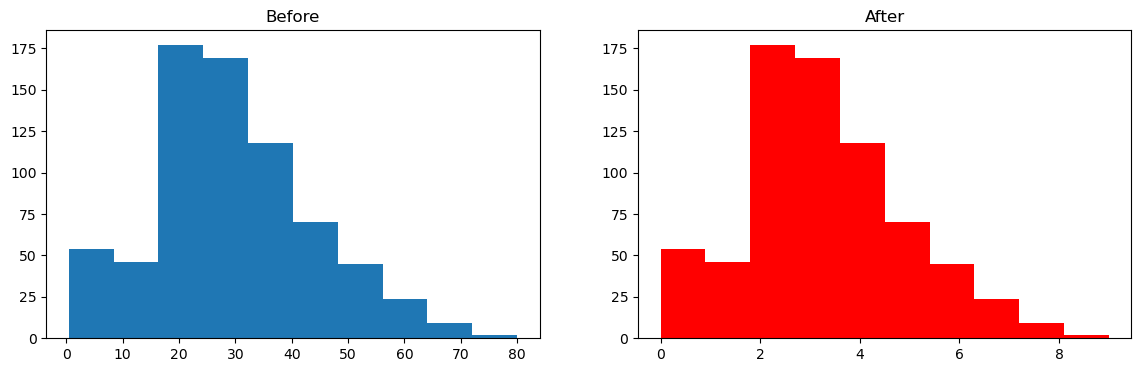

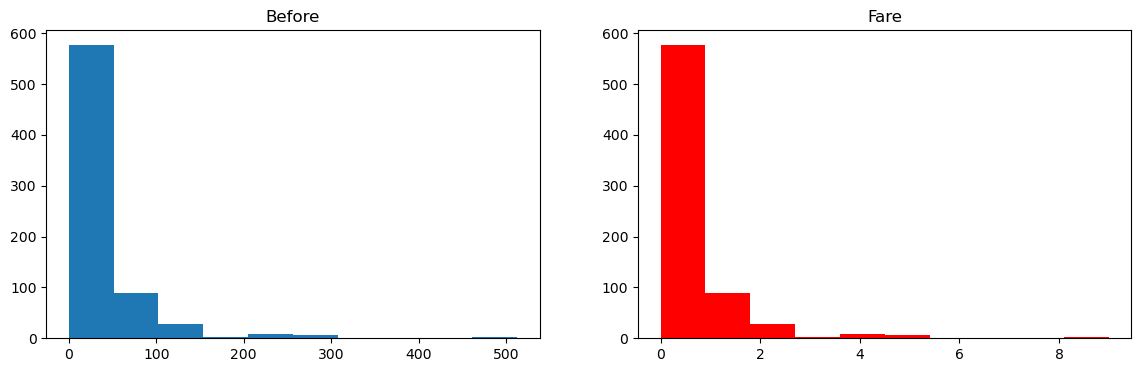

In [84]:
discretize(10,'uniform')

In [60]:
x_train

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000
...,...,...
92,46.0,61.1750
134,25.0,13.0000
337,41.0,134.5000
548,33.0,20.5250
